# DonorsChoose.org
***
<b>Class: </b>CMPE_257 Machine Learning <br>
<b>Team Name: </b>The Seekers <br>
<b>Authors: </b>Vidhi Shah, Sithara KrishnaMurthy, Pragya Gautam, Reetika Goel <br>
***
<b>The Narrative:</b> <br>There is fantastic saying by Mother Teresa that says “It’s not how much we give but how much love we put into giving.”
In this age, technology has made it so much easier for everyone to give and by that it has helped millions of people globally. Donations can be made through a small text message or just a simple click of a button. The team at DonorsChoose.org does an amazing job to support the public education there by bringing classroom dreams to life for teachers and students all over United States. Donorschoose.org is an online charity platform dedicated to supporting K-12 public education in the U.S. Briefly, it is a crowdfunding site where teachers can post or create project requests and where donors can donate and help raise funds to fulfill the teachers’ educational causes.Speaking about statistics, It has already raised $685 million through 3 million people and partners funding 1.1 million DonorsChoose.org projects.
<br><br>
<b> The DataSet:</b><br>
The data-set we are using here is from below Kaggle Link. We are going to use Donations.csv, Projects.csv and Schools.csv files from it to achieve our goal. Below is a short statistic on the same:<br>
Shape of Donations Data: 4687884 records, 7 features <br>
Shape of Schools Data: 72993 records, 9 features <br>
Shape of Projects Data: 1110017 records, 18 features <br>
<b>Kaggle Link:</b> https://www.kaggle.com/donorschoose/io/home

In addition to the above datasets, we are using the SchoolRating.csv dataset, generated by web scraping www.niche.com using BeautifulSoup.
We have obtained details of Schools located in California, Texas and NewYork.<br>
Shape of SchoolRating_TX Data: 8268 records, 11 features <br>
Shape of SchoolRating_CA Data: 9647 records, 11 features <br>
Shape of SchoolRating_NY Data: 4759 records, 11 features <br>
<br><br>
<b> The Business Objective:</b><br> To support teachers with the generation of donation based on the data available regarding the projects, donations and schools, this notebook contains an exploration of DonorsChoose.org data. A simple prediction model is developed to identify whether a new project will be fully-funded or not. This will surely help the teachers requesting donations to take required measures to have higher chance of their projects being fully funded. We “The Seekers” team, as data scientists/ machine learning engineers are ready to take up the challange to find and help them.<br>

<b> Amalgamation Techniques used:</b><br>
<ul>
<li>Random Forest</li>
<li>XGBoost</li>
<li>Extra Trees Classifier</li></ul><br>
<b>Latent Variable:</b>Duration Project Was Live<br><br>
<b>Distillations:</b><ul>
<li>"The Count of Number of Projects Posted Every Year - Month Wise"</li>
<li>"The Count of Number of Fully Funded Every Year - Month Wise"</li></ul>

In [0]:
# import libraries
import pandas as pd
import numpy as np
from string import Template

import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import plotly.plotly as py1
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
offline.init_notebook_mode()
from matplotlib.pyplot import xticks
# import pydotplus
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
pd.options.display.float_format = '{:,.2g}'.format
from collections import Counter
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# !pip install --upgrade pandas
# !pip install statsmodels -U

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Read CSVs **

Authors: @Team

In [0]:
# read csvs
df_donations = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Donations.csv")
df_projects = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Projects.csv")
df_schools = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Schools.csv")

In [0]:
# print inital shapes for all csvs
print("Shape of Donations Data:",df_donations.shape,'\n')
print("Shape of Schools Data:",df_schools.shape,'\n')
print("Shape of Projects Data:",df_projects.shape,'\n')

Shape of Donations Data: (4687884, 7) 

Shape of Schools Data: (72993, 9) 

Shape of Projects Data: (1110017, 18) 



## Data Enrichment/Amalgamation using BeautifulSoup
<b>
* Using the datasets generated by scrapping www.niche.com. 
* Import the extracted School datasets for Texas, California and NewYork.
* Combine the datsets to form a single dataset.
* Merge the new combined dataset with the Schools dataset from DonorsChoose.
* Combine all the required datasets and extract the desired features for model training.</b>


Authors: @Pragya and Reetika

In [0]:
df_schoolRatingTX = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Data Enrichment 2/schoolRating_TX.csv")
df_schoolRatingTX.rename(columns={'District': 'School District','State': 'School State' }, inplace=True)
df_schoolRatingTX['School State'] = df_schoolRatingTX['School State'].apply(lambda x: 'Texas' if x=='TX' else x)
print(df_schoolRatingTX.shape)
#df_schoolRatingTX.head(2)

(8268, 11)


In [0]:
df_schoolRatingCA = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Data Enrichment 2/schoolRating_CA.csv")
df_schoolRatingCA.rename(columns={'District': 'School District', 'State': 'School State'}, inplace=True)
df_schoolRatingCA['School State'] = df_schoolRatingCA['School State'].apply(lambda x: 'California' if x=='CA' else x)
print(df_schoolRatingCA.shape)
#df_schoolRatingCA.head(2)

(9647, 11)


In [0]:
df_schoolRatingNY = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/theseekers/DataSets/Data Enrichment 2/schoolRating_NY.csv")
df_schoolRatingNY.rename(columns={'District': 'School District', 'State': 'School State'}, inplace=True)
df_schoolRatingNY['School State'] = df_schoolRatingNY['School State'].apply(lambda x: 'New York' if x=='NY' else x)
print(df_schoolRatingNY.shape)
#df_schoolRatingNY.head(2)

(4759, 11)


In [0]:
MergeRatings = [df_schoolRatingTX, df_schoolRatingCA, df_schoolRatingNY]
SchoolRatings = pd.concat(MergeRatings)
print(SchoolRatings.shape)
#SchoolRatings.head(2)

(22674, 11)


In [0]:
# merged DataFrames
merged_Schooldata = pd.merge(df_schools, SchoolRatings, how='inner', on=['School Name', 'School District', 'School State'])
print(merged_Schooldata.shape)
#merged_Schooldata.head(2)

(3507, 17)


## Merging Donations + Projects + Schools(Merged with web scrapped - Niche dataset)

Following steps are done for merging and getting the final dataframe:<br>
1. <b>Get the donations count per donor ID</b>
2. <b> Select target donors with donations count>= 1</b>
3. <b> For all the donors above get all information from donations csv and sort it by donation date desc</b>
4. <b> Drop duplicate values and populate target_donors with only Donor ID</b>
5. <b> Select target projects : First merge target_donors and donations, get unique projects out of it to create target_projects data frame. Finally get all the projects from df_projects that belongs to target_projects</b>
6. <b>Count Total Donation amount for each Donor ID per Project ID</b>
7. <b>Filter the dataframe to get the donations between [1,200] as most of the donors have donated in the same range. We are not considering other donors now to get better classification results</b>

@Authors: Vidhi and Sithara

In [0]:
# Get the donations count per donor ID
donations_count = pd.DataFrame(
   df_donations.groupby("Donor ID")['Project ID'].count()
)

donations_count.reset_index(inplace = True)
donations_count.rename(columns = {'Project ID':'Donations_Count'},
                      inplace = True)
donations_count.head()

,Donor ID,Donations_Count
0,00000ce845c00cbf0686c992fc369df4,1
1,00002783bc5d108510f3f9666c8b1edd,1
2,00002d44003ed46b066607c5455a999a,11
3,00002eb25d60a09c318efbd0797bffb5,5
4,0000300773fe015f870914b42528541b,1


In [0]:
# Select target donors with donations count>= 2
target_donors = donations_count[donations_count['Donations_Count'] >= 1]

# For all the donors above get all information from donations csv and sort it by donation date desc

target_donations = df_donations[df_donations['Donor ID'].isin(target_donors['Donor ID'])]
target_donations = target_donations.sort_values('Donation Received Date', ascending=False)

# Drop duplicate values and populate target_donors with only Donor ID

target_donors = target_donations.drop_duplicates('Donor ID', keep='first')['Donor ID']
target_donors = target_donors.to_frame(name='Donor ID').reset_index()

# Select target projects : First merge target_donors and donations, get unique projects out of it to create
                       # target_projects data frame. Finally get all the projects from df_projects that belongs
                       # to target_projects

target_projects = target_donors.merge(target_donations, on='Donor ID')
target_projects = target_projects['Project ID'].unique()
target_projects = df_projects[df_projects['Project ID'].isin(target_projects)]

target_projects.head(2)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,3.6e+02,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,5.1e+02,2013-01-01,2013-05-31,Expired,NaN


In [0]:
# merged DataFrames
def merge_dataframes(source,dest,joincol):
   merged_df = source.merge(dest, on=joincol)
   print(merged_df.shape)
   return merged_df

merged_donation = merge_dataframes(target_donations,target_projects,'Project ID')
# merged_donation = merge_dataframes(merged_donation,df_donors,'Donor ID')
merged_donation_school = merge_dataframes(merged_donation,merged_Schooldata,'School ID')

(4614113, 24)
(171210, 40)


In [0]:
merged_don_school = (merged_donation_school.groupby(['Project ID', 'Donor ID'])
                  .agg({'Donation Amount':'sum'})
                  .rename(columns={'Donation Amount': 'Total Donation'})
                  .reset_index()
                 )
merged_don_school.head(2)

,Project ID,Donor ID,Total Donation
0,0000f23556cf6dc5e5d0e14eff6ef68f,0c934c3b5094460e8e91faeb1907d5ca,30
1,0000f23556cf6dc5e5d0e14eff6ef68f,51dd3b27d4cdff079ae90068972c6fde,1.5e+02


In [0]:
merged_don_school = merged_donation_school.merge(merged_don_school, on=['Project ID', 'Donor ID'])
#merged_don_school.head(2)

In [0]:
merged_don_school = (merged_don_school.drop_duplicates(['Project ID', 'Donor ID'], keep='first')
                  .drop('Donation Amount', axis=1)
                  .rename(columns={'Total Donation':'Donation Amount'})
                 )
#merged_don_school.head(2)

In [0]:
df_merged = merged_don_school.loc[(merged_don_school['Donation Amount'] >= 1) & (merged_don_school['Donation Amount'] <= 200)]
print(df_merged.shape)
#df_merged.head(2)

(136768, 40)


In [0]:
df_merged['Donation Received Date'] = pd.to_datetime(df_merged['Donation Received Date'])
df_merged['Donation Received Date'].dtypes
df_merged['Project Posted Date'] = pd.to_datetime(df_merged['Project Posted Date'])
df_merged['Project Posted Date'].dtypes
df_merged['Donation Received Month'] = df_merged['Donation Received Date'].dt.month
df_merged['Donation Received Year'] = df_merged['Donation Received Date'].dt.year

## Feature Engineering

@Authors: Vidhi and Pragya

In [0]:
df_merged.columns

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donor Cart Sequence',
       'Donation Received Date', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'School Name',
       'School Metro Type', 'School Percentage Free Lunch', 'School State',
       'School Zip', 'School City', 'School County', 'School District',
       'Rank in America', 'School Grade Level', 'Rating', 'User Reviews',
       'Overall Niche Grade', 'School Strength', 'Student Teacher Ratio',
       'Extracted Date', 'Donation Amount', 'Donation Received Month',
       '

In [0]:
features = ['Donation ID','Project ID','School ID','Donation Received Month','Donation Received Year','Project Type','Project Subject Category Tree',
           'Project Grade Level Category', 'Project Resource Category','Project Cost','Project Posted Date',
           'Project Current Status','Project Expiration Date','Project Fully Funded Date','School Name',
            'School Metro Type','School State','School District','Donation Amount','Overall Niche Grade', 'School Strength']

new = df_merged[features].copy()

In [0]:
print(new.shape)
new.head(2)

(136768, 21)


,Donation ID,Project ID,School ID,Donation Received Month,Donation Received Year,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,...,Project Current Status,Project Expiration Date,Project Fully Funded Date,School Name,School Metro Type,School State,School District,Donation Amount,Overall Niche Grade,School Strength
0,869bff963f832120cceba3d4b286b7fe,ab674ee914556e0b10aa1b3256175891,7d46ee1f4c615f1820e033a521822793,5,2018,Teacher-Led,"Literacy & Language, Math & Science",Grades PreK-2,Books,2.8e+02,...,Fully Funded,2018-07-28,2018-05-10,Westwood Primary School,town,Texas,Westwood Ind School District,70,B+,460
1,7673bc5aa868baeab1eb7635a5d9bacd,9937a5be510bf6e5ef323f959b33568b,7d46ee1f4c615f1820e033a521822793,5,2018,Teacher-Led,Math & Science,Grades PreK-2,Books,5e+02,...,Fully Funded,2018-07-28,2018-05-09,Westwood Primary School,town,Texas,Westwood Ind School District,50,B+,460


In [0]:
new.dtypes

Donation ID                              object
Project ID                               object
School ID                                object
Donation Received Month                   int64
Donation Received Year                    int64
Project Type                             object
Project Subject Category Tree            object
Project Grade Level Category             object
Project Resource Category                object
Project Cost                            float64
Project Posted Date              datetime64[ns]
Project Current Status                   object
Project Expiration Date                  object
Project Fully Funded Date                object
School Name                              object
School Metro Type                        object
School State                             object
School District                          object
Donation Amount                         float64
Overall Niche Grade                      object
School Strength                         

### Null Check / Type Conversion / Drop unused columns

In [0]:
def null_check(df,name):
    print(name)
    print('Number of rows and cols are {} and {}'.format(df.shape[0],
            df.shape[1]))
    print('Number of nulls are \n{}'.format(df.isnull().sum()),'\n')
    
def type_convert(df,column,dtype):
    print("Data Type before conversion:",df[column].dtypes,'\n')
    df[column] = df[column].astype(dtype)
    print("Data Type after conversion:",df[column].dtypes)
 
def drop_col(df,column):
    print("Column to Drop is :",column,'\n')
    df.drop(columns=column,axis=1,inplace=True)

In [0]:
new['Project Expiration Date'] = pd.to_datetime(new['Project Expiration Date'])
new['Project Fully Funded Date'] = pd.to_datetime(new['Project Fully Funded Date'])

In [0]:
timestamp = pd.to_datetime('now')
new['Current Date'] = timestamp.replace(hour = 0, minute = 0, second = 0, microsecond = 0)

### Latent Variable Identification<br>

Based on Project Current Status being 'Expired', 'Fully Funded' or 'Live', we have generated a <b>Latent variable named "Duration Project Was Live"</b>. <br>
"Duration Project Was Live" is the difference between project posted date and the number of days project takes to get fully-funded/expired. <br>
***
As we are going to identify whether a project gets fully funded or not, this latent variable adds a value towards our prediction which we will see in the classification section

@Author: Vidhi and Sithara

In [0]:
def getduration(currstatus, expiredate,ffdate,posteddate,currdate):
    if currstatus == 'Expired':
        duration = expiredate - posteddate
    elif currstatus == 'Fully Funded':
        duration = ffdate - posteddate
    else:
        duration = currdate - posteddate
    return duration

In [0]:
new['Duration_Project_Was_Live'] = new.apply(lambda x:getduration(x['Project Current Status'],x['Project Expiration Date'],x['Project Fully Funded Date'],x['Project Posted Date'],x['Current Date']), axis = 1)

In [0]:
new['Duration_Project_Was_Live'] = new['Duration_Project_Was_Live'].apply(lambda x: x/np.timedelta64(1,'D'))

In [0]:
new['Project Current Status'].value_counts()

Fully Funded    121151
Expired          13960
Live              1657
Name: Project Current Status, dtype: int64

### Replace NaN with meaningful values

In [0]:
#Project Resource Catogery
new['Project Resource Category'].fillna('Other', inplace=True)
#Project Subject Category Tree
new['Project Subject Category Tree'].fillna('Other', inplace=True)

### Label Encoding Categorical values to Numerical

In [0]:
# Label Encoding
le = preprocessing.LabelEncoder()
new['Project Grade Level Category_Label'] = le.fit_transform(new['Project Grade Level Category'])
new['Project Resource Category_Label'] = le.fit_transform(new['Project Resource Category'])
new['Project Type_Label'] = le.fit_transform(new['Project Type'])
new['Project Subject Category Tree_Label'] = le.fit_transform(new['Project Subject Category Tree'])
new['Project Current Status_Label'] = le.fit_transform(new['Project Current Status'])
new['School Name_Label'] = le.fit_transform(new['School Name'])
new['School Metro Type_Label'] = le.fit_transform(new['School Metro Type'])
new['School State_Label'] = le.fit_transform(new['School State'])
new['School District_Label'] = le.fit_transform(new['School District'])
new['Overall Niche Grade_Label'] = le.fit_transform(new['Overall Niche Grade'])

In [0]:
new.dtypes

Donation ID                                    object
Project ID                                     object
School ID                                      object
Donation Received Month                         int64
Donation Received Year                          int64
Project Type                                   object
Project Subject Category Tree                  object
Project Grade Level Category                   object
Project Resource Category                      object
Project Cost                                  float64
Project Posted Date                    datetime64[ns]
Project Current Status                         object
Project Expiration Date                datetime64[ns]
Project Fully Funded Date              datetime64[ns]
School Name                                    object
School Metro Type                              object
School State                                   object
School District                                object
Donation Amount             

## Clustering

### K-Means Clustering

@Author: Vidhi

In [0]:
df_kmeans = new.copy()

In [0]:
df_kmeans['Donation ID'] = le.fit_transform(df_kmeans['Donation ID'])

In [0]:
df_kmeans = df_kmeans.sort_values(by='Donation ID')
df_kmeans.head(2)

,Donation ID,Project ID,School ID,Donation Received Month,Donation Received Year,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,...,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
9151,0,8c4c0497021ce7f6cc7e71c45401bf4d,80a83611d767112fde7cf242a9673a94,8,2015,Teacher-Led,Math & Science,Grades 6-8,Technology,8.1e+02,...,1,14,2,30,1,2003,4,0,16,8
90176,1,7a4f4f791480b09f52a710ab251a67a2,90f9e4a738b1653836be20642ba5ae46,2,2018,Teacher-Led,Math & Science,Grades 3-5,Computers & Tablets,2.2e+03,...,0,3,2,30,1,2455,0,2,490,6


In [0]:
merged_kmeans = df_kmeans.copy()
merged_kmeans.set_index('Donation ID', inplace=True)
# df_kmeans['Donation ID'].max() #3732820
# df_kmeans.shape

In [0]:
df_new = merged_kmeans.copy()
merged_kmeans.head(2)

,Project ID,School ID,Donation Received Month,Donation Received Year,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,...,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
Donation ID,,,,,,,,,,,,,,,,,,,,,
0,8c4c0497021ce7f6cc7e71c45401bf4d,80a83611d767112fde7cf242a9673a94,8,2015,Teacher-Led,Math & Science,Grades 6-8,Technology,8.1e+02,2015-08-23,...,1,14,2,30,1,2003,4,0,16,8
1,7a4f4f791480b09f52a710ab251a67a2,90f9e4a738b1653836be20642ba5ae46,2,2018,Teacher-Led,Math & Science,Grades 3-5,Computers & Tablets,2.2e+03,2018-01-18,...,0,3,2,30,1,2455,0,2,490,6


In [0]:
cols_to_drop = ['Project ID','School ID','Project Posted Date','Project Expiration Date','Project Fully Funded Date',
               'Current Date','Project Grade Level Category','Project Resource Category','Project Type',
                'Project Subject Category Tree','Project Current Status','School Name','School Metro Type',
                'School State','School District','Overall Niche Grade']

drop_col(df_new,cols_to_drop)
print("DONE!")

Column to Drop is : ['Project ID', 'School ID', 'Project Posted Date', 'Project Expiration Date', 'Project Fully Funded Date', 'Current Date', 'Project Grade Level Category', 'Project Resource Category', 'Project Type', 'Project Subject Category Tree', 'Project Current Status', 'School Name', 'School Metro Type', 'School State', 'School District', 'Overall Niche Grade'] 

DONE!


In [0]:
df_new['School Strength'] = df_new['School Strength'].apply(lambda x: x.replace(',','') if(',' in x) else x)
#df_new['School Strength'].value_counts()
df_new['School Strength'] = df_new['School Strength'].astype(int)

In [0]:
df_new.dtypes

Donation Received Month                  int64
Donation Received Year                   int64
Project Cost                           float64
Donation Amount                        float64
School Strength                          int64
Duration_Project_Was_Live              float64
Project Grade Level Category_Label       int64
Project Resource Category_Label          int64
Project Type_Label                       int64
Project Subject Category Tree_Label      int64
Project Current Status_Label             int64
School Name_Label                        int64
School Metro Type_Label                  int64
School State_Label                       int64
School District_Label                    int64
Overall Niche Grade_Label                int64
dtype: object

In [0]:
df_new.isna().sum()
df_new.dropna(axis=0, inplace=True)

In [0]:
df_new.head()

,Donation Received Month,Donation Received Year,Project Cost,Donation Amount,School Strength,Duration_Project_Was_Live,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
Donation ID,,,,,,,,,,,,,,,,
0,8,2015,8.1e+02,1.2e+02,706,11,1,14,2,30,1,2003,4,0,16,8
1,2,2018,2.2e+03,45,276,22,0,3,2,30,1,2455,0,2,490,6
2,11,2017,4.9e+02,1,803,1.1e+02,1,5,2,36,1,501,4,2,0,3
3,9,2016,9.9e+02,99,837,6,3,14,2,27,1,774,4,2,135,8
4,12,2014,1.6e+04,1e+02,966,7,1,15,2,37,1,1092,0,2,144,0


In [0]:
X = df_new.copy()
# kmeans = KMeans(n_clusters = 5).fit(X)

In [0]:
X_sample = X.sample(n = 10000, axis = 0)
X_sample.shape

(10000, 16)

In [0]:
X_sample.head()

,Donation Received Month,Donation Received Year,Project Cost,Donation Amount,School Strength,Duration_Project_Was_Live,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
Donation ID,,,,,,,,,,,,,,,,
117669,9,2017,9.1e+02,50,1151,4,3,14,2,27,1,1041,0,2,220,7
77929,6,2017,1.5e+02,20,691,1,3,1,2,23,1,2884,3,1,305,4
125527,1,2018,8.2e+02,5,746,1.2e+02,3,3,2,23,0,872,1,2,413,4
94278,10,2014,2e+02,20,202,19,2,14,2,18,1,846,4,0,100,7
92281,6,2017,1e+03,2e+02,3948,17,2,14,2,4,1,1108,4,2,7,7


In [0]:
kmeans = KMeans(n_clusters = 5).fit(X_sample)
len(kmeans.cluster_centers_)

5

In [0]:
kmeans.cluster_centers_

array([[6.84188912e+00, 2.01548665e+03, 9.01678522e+02, 4.86696920e+01,
        2.80728953e+03, 4.64599589e+01, 1.98767967e+00, 1.01642710e+01,
        1.95071869e+00, 2.51252567e+01, 9.01437372e-01, 1.34975770e+03,
        2.17659138e+00, 1.73511294e+00, 2.21295688e+02, 3.93429158e+00],
       [6.81156480e+00, 2.01562972e+03, 5.76295805e+02, 4.36769161e+01,
        6.73300533e+02, 4.69272128e+01, 1.60385493e+00, 1.03738270e+01,
        1.98250063e+00, 2.36971849e+01, 9.17321836e-01, 2.26067284e+03,
        2.43646969e+00, 1.61247781e+00, 2.82637839e+02, 4.15698707e+00],
       [6.93569132e+00, 2.01563130e+03, 2.07483290e+03, 5.23939335e+01,
        8.68125402e+02, 6.29560557e+01, 1.37942122e+00, 1.23086817e+01,
        1.97534834e+00, 2.47684887e+01, 8.21007503e-01, 1.41850482e+03,
        2.60450161e+00, 1.58413719e+00, 2.39632369e+02, 3.87674169e+00],
       [6.83300675e+00, 2.01553473e+03, 5.76748208e+02, 4.37823057e+01,
        6.67736773e+02, 4.70925321e+01, 1.66187677e+00, 1.016

In [0]:
print(len(kmeans.cluster_centers_[0]))
kmeans.cluster_centers_[4]

16


array([6.40909091e+00, 2.01497727e+03, 9.30376091e+03, 5.42727273e+01,
       6.06409091e+02, 5.67954545e+01, 3.63636364e-01, 1.42954545e+01,
       2.00000000e+00, 2.70454545e+01, 9.09090909e-01, 1.27445455e+03,
       3.15909091e+00, 1.63636364e+00, 1.52863636e+02, 4.54545455e+00])

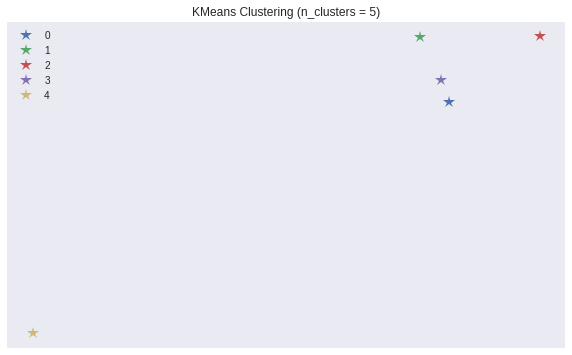

In [0]:
plt.figure(figsize=(10,6))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'*', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend()
plt.title('KMeans Clustering (n_clusters = 5)');

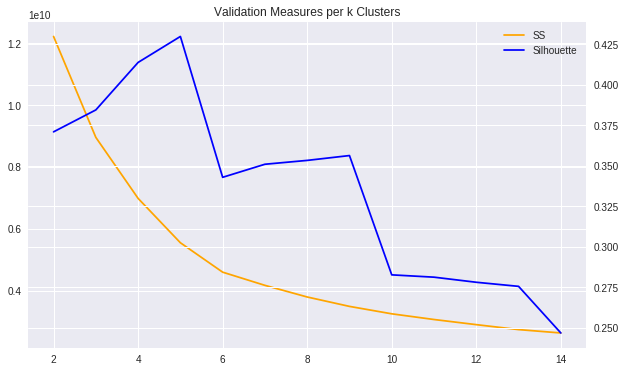

In [0]:
from sklearn.metrics import silhouette_score
sse = []
silhouette = []
krange = range(2, 15)
plt.figure(figsize=(10,6))
for k in krange:
    kmeans = KMeans(n_clusters = k).fit(X_sample)
    sse.append(kmeans.inertia_)
    
    labels = kmeans.predict(X_sample)
    sl = silhouette_score(X_sample, labels)
    silhouette.append(sl)
    
plt.plot(krange, sse, label='SS', c='orange')
lines, labels = plt.gca().get_legend_handles_labels()
plt.twinx()
plt.plot(krange, silhouette, label = 'Silhouette', c='blue')
lines2, labels2 = plt.gca().get_legend_handles_labels()
plt.legend(lines+lines2, labels+labels2)
plt.title("Validation Measures per k Clusters")
plt.show()

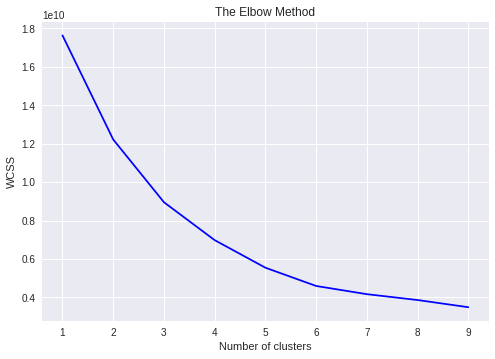

In [0]:
# def k_means(df,no_of_clusters):
#     kmeans = KMeans(n_clusters=no_of_clusters)
#     kmeans_model = kmeans.fit(df)
#     return kmeans

def elbow(df):
    K = range(1,10)
    wcss = []
    for i in K:
        kmeans = KMeans(n_clusters=i)
        kmeans = kmeans.fit(df)
        wcss.append(kmeans.inertia_) #within-cluster sums of squares
    plt.plot(K,wcss, 'bx-')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()    

elbow(X_sample)

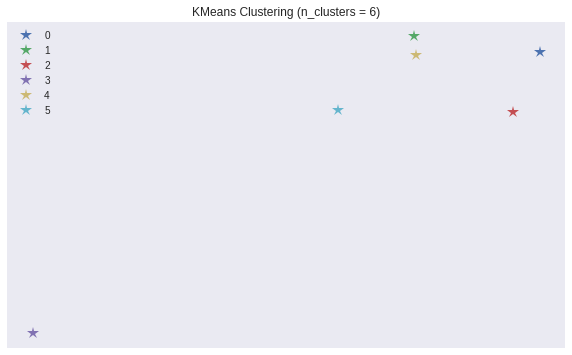

In [0]:
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters).fit(X_sample)
plt.figure(figsize=(10,6))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'*', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend()
plt.title('KMeans Clustering (n_clusters = {})'.format(n_clusters));

In [0]:
X_sample.iloc[kmeans.labels_==0,:].head(5)

,Donation Received Month,Donation Received Year,Project Cost,Donation Amount,School Strength,Duration_Project_Was_Live,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
Donation ID,,,,,,,,,,,,,,,,
16183,9,2015,1.6e+03,50,573,1.2e+02,3,14,2,23,1,1222,1,2,254,3
99558,1,2016,1.5e+03,10,481,65,0,15,2,0,0,2002,4,2,30,4
29743,9,2014,1.6e+03,1e+02,874,52,3,14,2,27,1,1279,1,0,161,0
23523,1,2014,2.7e+03,1,1763,41,2,14,2,37,1,1864,1,0,386,5
69521,3,2017,2.7e+03,50,477,1.2e+02,3,14,2,23,0,842,1,0,342,8


In [0]:
new.head(2)

,Donation ID,Project ID,School ID,Donation Received Month,Donation Received Year,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,...,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
0,869bff963f832120cceba3d4b286b7fe,ab674ee914556e0b10aa1b3256175891,7d46ee1f4c615f1820e033a521822793,5,2018,Teacher-Led,"Literacy & Language, Math & Science",Grades PreK-2,Books,2.8e+02,...,3,1,2,27,1,2822,2,2,569,4
1,7673bc5aa868baeab1eb7635a5d9bacd,9937a5be510bf6e5ef323f959b33568b,7d46ee1f4c615f1820e033a521822793,5,2018,Teacher-Led,Math & Science,Grades PreK-2,Books,5e+02,...,3,1,2,30,1,2822,2,2,569,4


In [0]:
clusters_list = {}
for c in range(n_clusters):
    clusters_list[c] = merged_kmeans.iloc[X_sample.iloc[kmeans.labels_ == c, :].index]['Project ID']

In [0]:
X_sample.iloc[kmeans.labels_ == 0, :].index

Int64Index([ 16183,  99558,  29743,  23523,  69521,  43556,    403, 122329,
             99775,  82977,
            ...
             88964,  95023,  75900,  56429,  16615,  61746,  46922,  51816,
             22843,  58880],
           dtype='int64', name='Donation ID', length=835)

In [0]:
merged_kmeans.iloc[X_sample.iloc[kmeans.labels_ == 0, :].index].sort_values(by=['Project ID','School ID'])
# merged_kmeans.iloc[X_sample.iloc[kmeans.labels_ == 0, :].index].duplicated()

#merged_kmeans.iloc[X_sample.iloc[kmeans.labels_ == 0, :].index].loc[1318168]

,Project ID,School ID,Donation Received Month,Donation Received Year,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,...,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label
Donation ID,,,,,,,,,,,,,,,,,,,,,
2684,00302703e5be29fee609ccef1d1d3053,85eb704612f1ec06cb7fae53af832658,8,2017,Teacher-Led,"Warmth, Care & Hunger",Grades 6-8,Supplies,1.9e+03,2017-08-30,...,1,13,2,45,1,2020,1,2,413,5
19015,00fcf802b01a806439aae9670d3c6915,ebf4dfa14badace8ad13b4aeb451eecd,9,2016,Teacher-Led,Literacy & Language,Grades 3-5,Technology,1.7e+03,2016-08-29,...,0,14,2,23,0,2356,1,2,11,4
136444,021f45a5301bb1996eecd6f0666feca1,eab8d8be86a02d1d22bef28d4e554489,8,2016,Teacher-Led,Math & Science,Grades 9-12,Supplies,2.2e+03,2016-06-08,...,2,13,2,30,0,68,4,2,171,6
88246,02d047115a6f0e710b84a771403313de,4c27f88384e03c4140197c5902edd261,3,2014,Teacher-Led,"Applied Learning, Health & Sports",Grades PreK-2,Other,1.7e+03,2014-03-08,...,3,10,2,1,1,851,4,0,504,4
26203,02d047115a6f0e710b84a771403313de,4c27f88384e03c4140197c5902edd261,3,2014,Teacher-Led,"Applied Learning, Health & Sports",Grades PreK-2,Other,1.7e+03,2014-03-08,...,3,10,2,1,1,851,4,0,504,4
62221,02d047115a6f0e710b84a771403313de,4c27f88384e03c4140197c5902edd261,3,2014,Teacher-Led,"Applied Learning, Health & Sports",Grades PreK-2,Other,1.7e+03,2014-03-08,...,3,10,2,1,1,851,4,0,504,4
17814,02faa776b7972a689c570d7a91d5f8b6,c5b1b1c44e9739d0873cd8dfbd8ea58a,4,2016,Student-Led,"Applied Learning, Music & The Arts",Grades 9-12,Technology,2.3e+03,2016-04-06,...,2,14,1,5,1,1479,4,2,30,5
83181,039719dbfcc5d35acad693f6505864df,a1e5be49e85a044faf5867ed923cf956,5,2013,Teacher-Led,Literacy & Language,Grades 6-8,Technology,2.4e+03,2013-05-05,...,1,14,2,23,0,2516,4,1,3,7
14382,03acf86d7528cde6723c98115454d09b,4ce6b7a3f7abfc36fa22047a0fd72858,9,2016,Teacher-Led,"History & Civics, Literacy & Language",Grades 3-5,Technology,1.9e+03,2016-07-20,...,0,14,2,18,1,2398,4,2,426,1


In [0]:
X_sample['Label'] = kmeans.labels_

In [0]:
X_sample['Label'].value_counts()

1    3089
5    2792
4    2768
0     835
2     472
3      44
Name: Label, dtype: int64

In [0]:
X_sample.shape

(10000, 17)

In [0]:
X_sample.head()

,Donation Received Month,Donation Received Year,Project Cost,Donation Amount,School Strength,Duration_Project_Was_Live,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label,Label
Donation ID,,,,,,,,,,,,,,,,,
117669,9,2017,9.1e+02,50,1151,4,3,14,2,27,1,1041,0,2,220,7,5
77929,6,2017,1.5e+02,20,691,1,3,1,2,23,1,2884,3,1,305,4,1
125527,1,2018,8.2e+02,5,746,1.2e+02,3,3,2,23,0,872,1,2,413,4,4
94278,10,2014,2e+02,20,202,19,2,14,2,18,1,846,4,0,100,7,4
92281,6,2017,1e+03,2e+02,3948,17,2,14,2,4,1,1108,4,2,7,7,2


In [0]:
X_sample.tail()

,Donation Received Month,Donation Received Year,Project Cost,Donation Amount,School Strength,Duration_Project_Was_Live,Project Grade Level Category_Label,Project Resource Category_Label,Project Type_Label,Project Subject Category Tree_Label,Project Current Status_Label,School Name_Label,School Metro Type_Label,School State_Label,School District_Label,Overall Niche Grade_Label,Label
Donation ID,,,,,,,,,,,,,,,,,
130203,1,2014,7.2e+02,10,660,4,3,14,2,27,1,2249,1,2,348,0,1
110017,9,2015,9.3e+02,1e+02,958,8,3,14,2,27,1,348,4,2,391,0,4
58880,8,2017,2e+03,1.6e+02,591,80,3,14,2,27,1,1939,1,0,60,0,0
75497,11,2015,7.4e+02,7.3,823,38,0,14,2,30,1,2878,4,2,135,5,1
42439,10,2017,1.6e+02,1.6e+02,687,36,0,1,2,23,1,1388,2,2,516,3,5


### PCA

Text(0, 0.5, 'PC2')

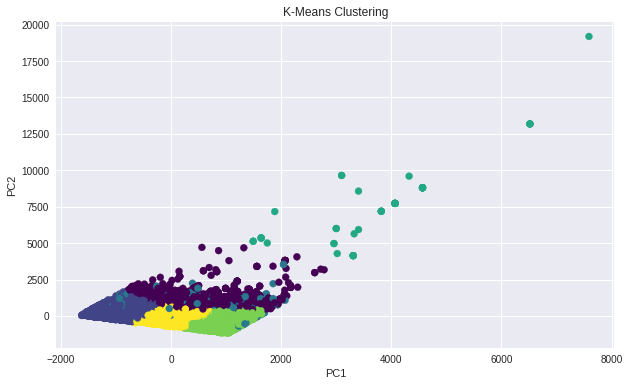

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit_transform(X_sample)
plt.figure(figsize=(10,6))
plt.scatter(pca[:,0],pca[:,1], c = kmeans.labels_,cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

#### Get correlations of each features in dataset and Plot heat map:

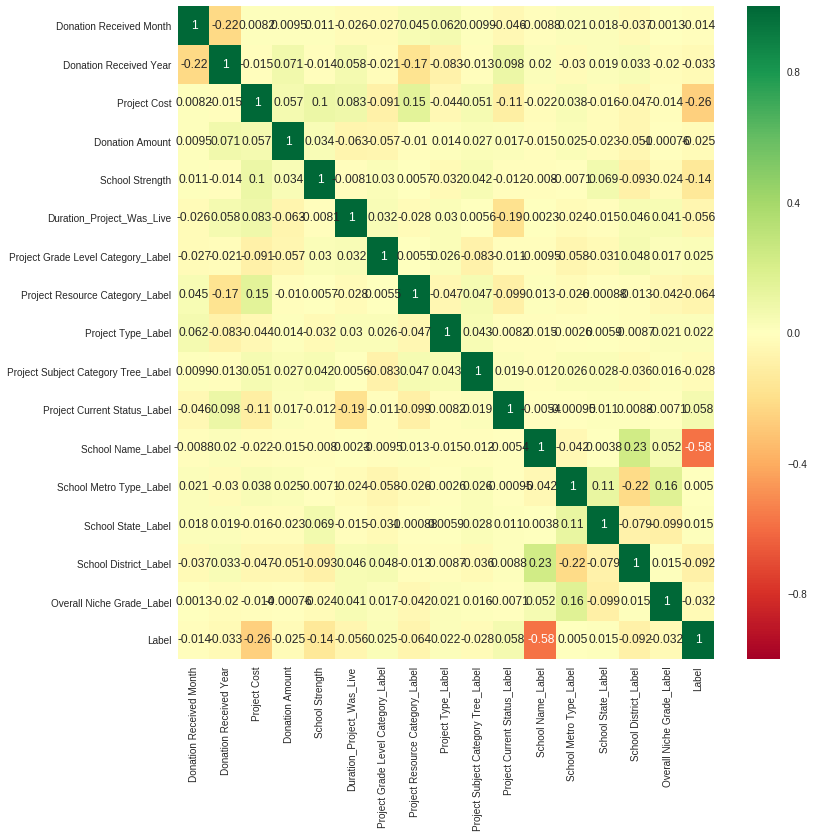

In [0]:
#get correlations of each features in dataset
corrmat = X_sample.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat mapb
g=sns.heatmap(X_sample[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### GMM
@Author: Pragya

In [0]:
def GMM_clusters(numOfClusters,data):
    gmm = GaussianMixture(n_components=numOfClusters).fit(data)
    labels = gmm.predict(data)
    return labels

X_sample['GMM_Label'] = GMM_clusters(7,X_sample)
X_sample['GMM_Label'].value_counts()

1    5195
0    2702
2     951
3     517
6     375
4     216
5      44
Name: GMM_Label, dtype: int64

Text(0, 0.5, 'PC2')

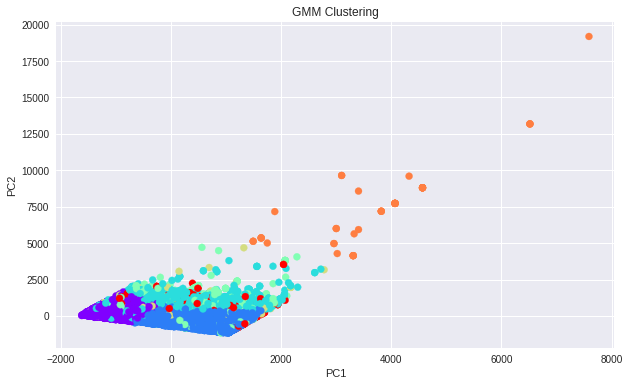

In [0]:
pca_gmm = PCA(n_components = 3).fit_transform(X_sample)
plt.figure(figsize=(10,6))
plt.scatter(pca_gmm[:,0],pca_gmm[:,1], c = X_sample['GMM_Label'],cmap='rainbow')
plt.title("GMM Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [0]:
X_sample.drop('GMM_Label',axis=1,inplace=True)

## Classification
***
As given in the Latent Variable section, "Duration Project Was Live" along with other 16 features from donations, schools and projects will help us in the identification of our target variable.<br>

As the prediction model will help us to know whether a project will be fully-funded or not, we are using 'Project Current Status' as the target variable. Here we have 3 distict values: "Fully-Funded", "Expired" and "Live". For the classification, we will train our data with fully-funded(1) /Expired(0) projects. And further we will make the predictions on "live" projects whether they will be fully funded or not.<br>
***
The Seperation of Train, Validation and Test data is done in following manner:<br>
<ul> <li> Train and Validation Set : Contains 16 features(except target variable) for Fully-funded/Expired Projects</li>
    <li> Test Set: Contains 16 features(except target variable) for Live Projects</li></ul>
    
    
 @Author : Team

In [0]:
auc = []

def plotROC_Curve(clf, X_test, y_test):
  #Predicting proba
  y_pred_prob = clf.predict_proba(X_test)[:,1]
  
  # # Generate ROC curve values: fpr, tpr, thresholds
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#   roc_auc = metrics.auc(fpr, tpr)
#   print(roc_auc)
  auc_score = metrics.roc_auc_score(y_test, y_pred_prob)
  auc.append(auc_score)
  plt.title('Receiver Operating Characteristic')
  plt.grid()
  plt.plot(fpr, tpr, 'b', marker='.', label = 'AUC = %0.2f' % auc_score)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle = '--',color='orangered')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [0]:
X_predict_live = X_sample[X_sample['Project Current Status_Label'] == 2]
print(X_predict_live['Project Current Status_Label'].value_counts())

X_predict_ffexpired = X_sample[(X_sample['Project Current Status_Label'] == 0) | (X_sample['Project Current Status_Label'] == 1)]
print(X_predict_ffexpired['Project Current Status_Label'].value_counts())
print(X_predict_ffexpired.shape)

2    120
Name: Project Current Status_Label, dtype: int64
1    8849
0    1031
Name: Project Current Status_Label, dtype: int64
(9880, 17)


In [0]:
X_1 = X_predict_ffexpired[X_predict_ffexpired['Project Current Status_Label'] == 1]
X_0 = X_predict_ffexpired[X_predict_ffexpired['Project Current Status_Label'] == 0]
X_1sample = X_1.sample(n = 1000, axis = 0).reset_index(drop=True)
print(X_1sample.shape)
print(X_0.shape)

X_predict_ffexpired_sub = X_1sample.append(X_0)
print(X_predict_ffexpired_sub.shape)
X_predict_ffexpired_sub['Project Current Status_Label'].value_counts()

(1000, 17)
(1031, 17)
(2031, 17)


0    1031
1    1000
Name: Project Current Status_Label, dtype: int64

In [0]:
# Take the log of Donation Amount and Project Cost
X_predict_ffexpired_sub['log_Project Cost'] = np.log10(X_predict_ffexpired_sub['Project Cost'])
X_predict_ffexpired_sub['log_Donation Amount'] = np.log10(X_predict_ffexpired_sub['Donation Amount'])

# Drop the non-transformed columns
X_predict_ffexpired_log = X_predict_ffexpired_sub.drop(columns = ['Project Cost', 'Donation Amount'])

In [0]:
X_ = X_predict_ffexpired_log.drop('Project Current Status_Label', axis = 1)
y_ = X_predict_ffexpired_log['Project Current Status_Label']

print(X_.shape)
print(y_.shape)

(2031, 16)
(2031,)


In [0]:
X_.columns

Index(['Donation Received Month', 'Donation Received Year', 'School Strength',
       'Duration_Project_Was_Live', 'Project Grade Level Category_Label',
       'Project Resource Category_Label', 'Project Type_Label',
       'Project Subject Category Tree_Label', 'School Name_Label',
       'School Metro Type_Label', 'School State_Label',
       'School District_Label', 'Overall Niche Grade_Label', 'Label',
       'log_Project Cost', 'log_Donation Amount'],
      dtype='object')

In [0]:
ylabel = y_.unique()
ylabels = ["Fully Funded" if x == 1 else "Expired" for x in ylabel]
ylabels

['Fully Funded', 'Expired']

### Logistic Regression

***
<b>Logistic regression</b> is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

@Author: Sithara

<b> Model Training and Fitting</b>

In [0]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_, y_, test_size = 0.25, random_state = 123)

lr = linear_model.LogisticRegression(C=10,penalty='l1')
lr.fit(X_train_LR, y_train_LR)

y_pred_LR = lr.predict(X_test_LR)
print("done with Logistic Regression")

done with Logistic Regression


In [0]:
X_sample.columns

Index(['Donation Received Month', 'Donation Received Year', 'Project Cost',
       'Donation Amount', 'School Strength', 'Duration_Project_Was_Live',
       'Project Grade Level Category_Label', 'Project Resource Category_Label',
       'Project Type_Label', 'Project Subject Category Tree_Label',
       'Project Current Status_Label', 'School Name_Label',
       'School Metro Type_Label', 'School State_Label',
       'School District_Label', 'Overall Niche Grade_Label', 'Label'],
      dtype='object')

<b> Quantify the Performance</b>

accuracy_score =  0.9094488188976378


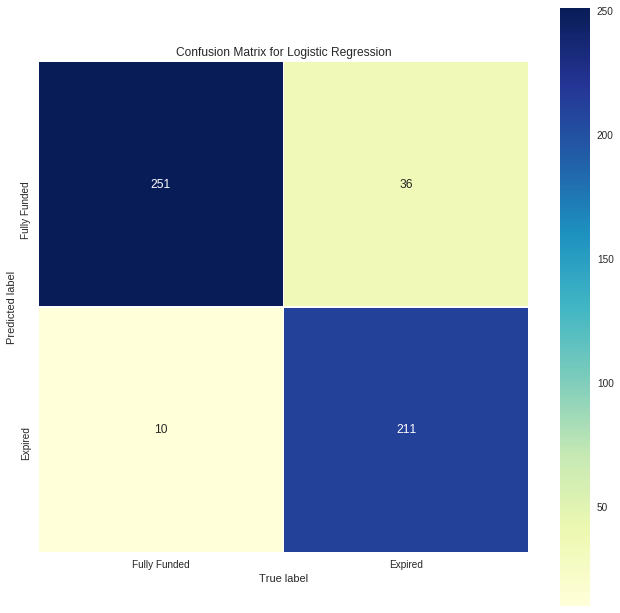

In [0]:
#accuracy calculation
accuracy_LR = accuracy_score(y_test_LR, y_pred_LR)
print('accuracy_score = ', accuracy_LR)
mat_LR = confusion_matrix(y_test_LR, y_pred_LR)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Logistic Regression")
sns.heatmap(mat_LR.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [0]:
cls_LR = classification_report(y_test_LR, y_pred_LR, target_names=ylabels)
print(cls_LR)

              precision    recall  f1-score   support

Fully Funded       0.87      0.96      0.92       261
     Expired       0.95      0.85      0.90       247

   micro avg       0.91      0.91      0.91       508
   macro avg       0.91      0.91      0.91       508
weighted avg       0.91      0.91      0.91       508



In [0]:
# print the number of correct matches
matches_LR = (y_pred_LR == y_test_LR)
print("The number of correct matches for Logistic Regression:",matches_LR.sum())

# The total number of data points
print("The total number of data points for Logistic Regression:",len(matches_LR))

# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Logistic Regression:",matches_LR.sum() / float(len(matches_LR)))

The number of correct matches for Logistic Regression: 462
The total number of data points for Logistic Regression: 508
Accuracy for Logistic Regression: 0.9094488188976378


<b> Predicting values for test set</b>

In [0]:
X_predict_liveset = X_predict_live.drop('Project Current Status_Label', axis = 1)
print(X_predict_liveset.shape)
predictions_LR = X_predict_liveset.copy()

(120, 16)


In [0]:
y_pred_testLR = lr.predict(X_predict_liveset)
y_pred_transformed_LR = ['Fully Funded' if x == 1 else 'Expired' for x in y_pred_testLR]
predictions_LR['Project Current Status'] = y_pred_transformed_LR
predictions_LR.to_csv('submit_EnrichBS_LR.csv', index = False)
print('done')

done


<b> Polynomial Equation </b>

In [0]:
data = {'Feature Name': list(X_), 'Co-efficient values': lr.coef_[0]}
coefficients=pd.DataFrame(data)
coefficients

,Co-efficient values,Feature Name
0,0.048,Donation Received Month
1,0.0044,Donation Received Year
2,-0.00023,School Strength
3,-0.074,Duration_Project_Was_Live
4,0.12,Project Grade Level Category_Label
5,-0.057,Project Resource Category_Label
6,1.4,Project Type_Label
7,0.024,Project Subject Category Tree_Label
8,-8.7e-05,School Name_Label
9,-0.1,School Metro Type_Label


<b> Plot ROC Curve</b>

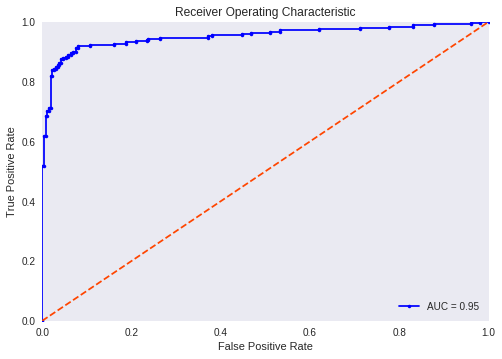

In [0]:
plotROC_Curve(lr,X_test_LR, y_test_LR)

###<h3>Random Forest</h3>

***
<b>Random Forest Classifiers</b> are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

@Author: Vidhi

<b> Model Training and Fitting </b> 

In [0]:
X_train_RFC,X_test_RFC,y_train_RFC,y_test_RFC = train_test_split(X_, y_ ,test_size= 0.25)
rfc = ensemble.RandomForestClassifier(random_state=42)
rfc.fit(X_train_RFC, y_train_RFC)

y_pred_RFC = rfc.predict(X_test_RFC)
print("done with Random Forest Classifier")

done with Random Forest Classifier


<b> Quantify the Performance</b>

accuracy_score =  0.9409448818897638


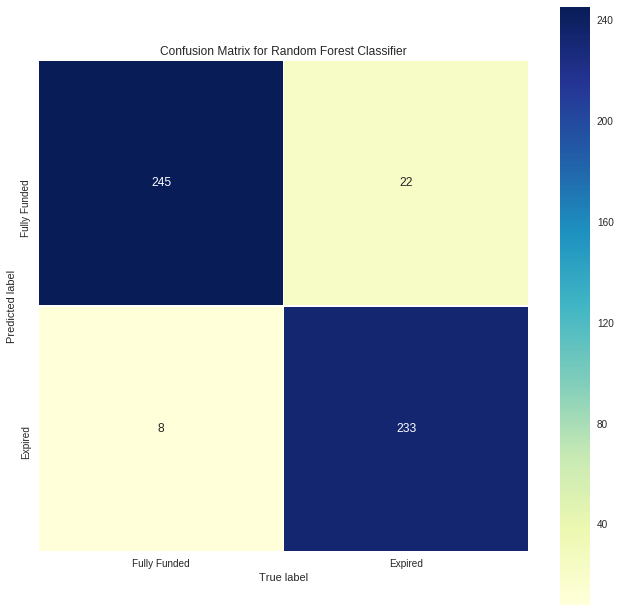

In [0]:
#accuracy calculation
accuracy_RFC = accuracy_score(y_test_RFC, y_pred_RFC)
print('accuracy_score = ', accuracy_RFC)
mat_RFC = confusion_matrix(y_test_RFC, y_pred_RFC)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Random Forest Classifier")
sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');


In [0]:
cls_RFC = classification_report(y_test_RFC, y_pred_RFC, target_names=ylabels)
print(cls_RFC)

              precision    recall  f1-score   support

Fully Funded       0.92      0.97      0.94       253
     Expired       0.97      0.91      0.94       255

   micro avg       0.94      0.94      0.94       508
   macro avg       0.94      0.94      0.94       508
weighted avg       0.94      0.94      0.94       508



In [0]:
# print the number of correct matches
matches_RFC = (y_pred_RFC == y_test_RFC)
print("The number of correct matches for Random Forest Classifier:",matches_RFC.sum())

# The total number of data points
print("The total number of data points for Random Forest Classifier:",len(matches_RFC))

# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Random Forest Classifier:",matches_RFC.sum() / float(len(matches_RFC)))

The number of correct matches for Random Forest Classifier: 478
The total number of data points for Random Forest Classifier: 508
Accuracy for Random Forest Classifier: 0.9409448818897638


<b> Predicting values for test set</b>

In [0]:
y_pred_testRFC = lr.predict(X_predict_liveset)
predictions_RFC = X_predict_liveset.copy()
y_pred_transformed_RFC = ['Fully Funded' if x == 1 else 'Expired' for x in y_pred_testRFC]
predictions_RFC['Project Current Status'] = y_pred_transformed_RFC
predictions_RFC.to_csv('submit_EnrichBS_RFC.csv', index = False)
print('done')

done


<b> Measuring Feature Importance </b>

[0.0166432  0.01527577 0.03008592 0.65260185 0.00817809 0.02101313
 0.00237508 0.02064347 0.03531611 0.00706777 0.00448222 0.02513403
 0.01804542 0.01660443 0.10688797 0.01964554]


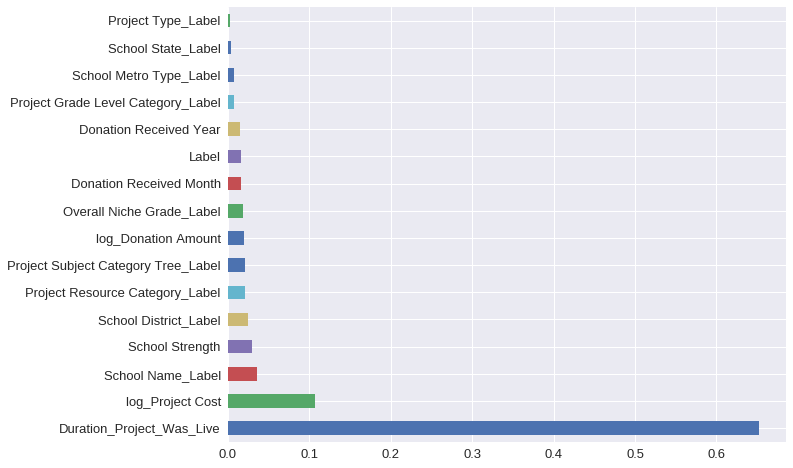

In [0]:
print(rfc.feature_importances_)

#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rfc.feature_importances_, index=X_.columns)
feat_importances.nlargest(20).plot(kind='barh',fontsize=13)
plt.show()

<b> Plot ROC Curve</b>

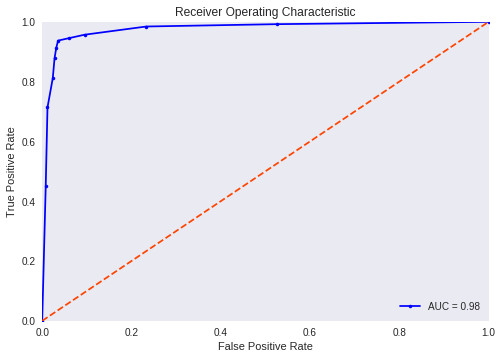

In [0]:
plotROC_Curve(rfc,X_test_RFC, y_test_RFC)

### Decision Tree

***
<b>Decision tree</b> builds classification or regression models in the form of a tree structure. It utilizes an if-then rule set which is mutually exclusive and exhaustive for classification. The rules are learned sequentially using the training data one at a time. Each time a rule is learned, the tuples covered by the rules are removed. This process is continued on the training set until meeting a termination condition.

@Author: Reetika

<b> Model Training and Fitting </b>

In [0]:
def TrainTestSplit(x,y):
  xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)
  return xTrain, xTest, yTrain, yTest

def decisionTreefunc(xTrain,yTrain,xTest):
  clf = DecisionTreeClassifier(max_depth=5,random_state=12)
  clf.fit(xTrain, yTrain)
  yPrediction = clf.predict(xTest)
  print("Decision Tree Done!")
  return clf,yPrediction

In [0]:
X_train, X_test, y_train, y_test = TrainTestSplit(X_,y_)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

clf,pred = decisionTreefunc(X_train,y_train,X_test)
print("done with Decision Tree")

<b> Quantify the Performance</b>

accuracy_score =  0.9231905465288035


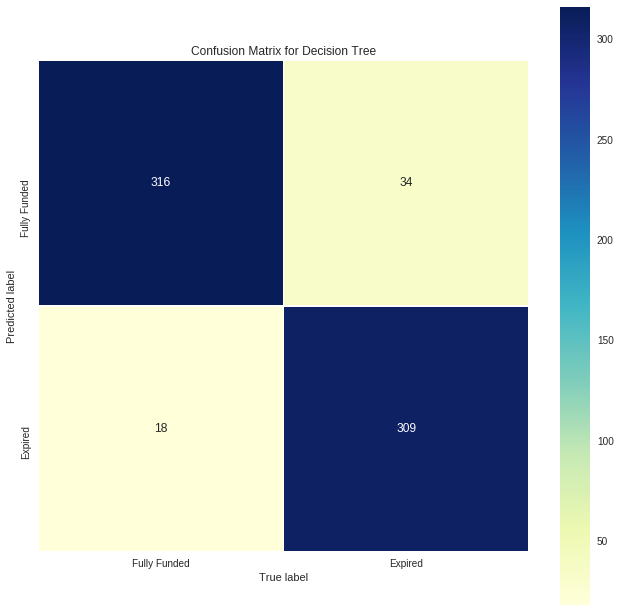

In [0]:
#accuracy calculation
accuracy = accuracy_score(y_test, pred)
print('accuracy_score = ', accuracy)
mat_dtree = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Decision Tree")
sns.heatmap(mat_dtree.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [0]:
cls_dtree = classification_report(y_test, pred, target_names=ylabels)
print(cls_dtree)

              precision    recall  f1-score   support

Fully Funded       0.90      0.95      0.92       334
     Expired       0.94      0.90      0.92       343

   micro avg       0.92      0.92      0.92       677
   macro avg       0.92      0.92      0.92       677
weighted avg       0.92      0.92      0.92       677



In [0]:
# print the number of correct matches
matches = (pred == y_test)
print("The number of correct matches for Decision Tree:",matches.sum())
# The total number of data points
print("The total number of data points for Decision Tree:",len(matches))
# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Decision Tree:",matches.sum() / float(len(matches)))

The number of correct matches for Decision Tree: 625
The total number of data points for Decision Tree: 677
Accuracy for Decision Tree: 0.9231905465288035


<b>Decision Tree Plot</b>

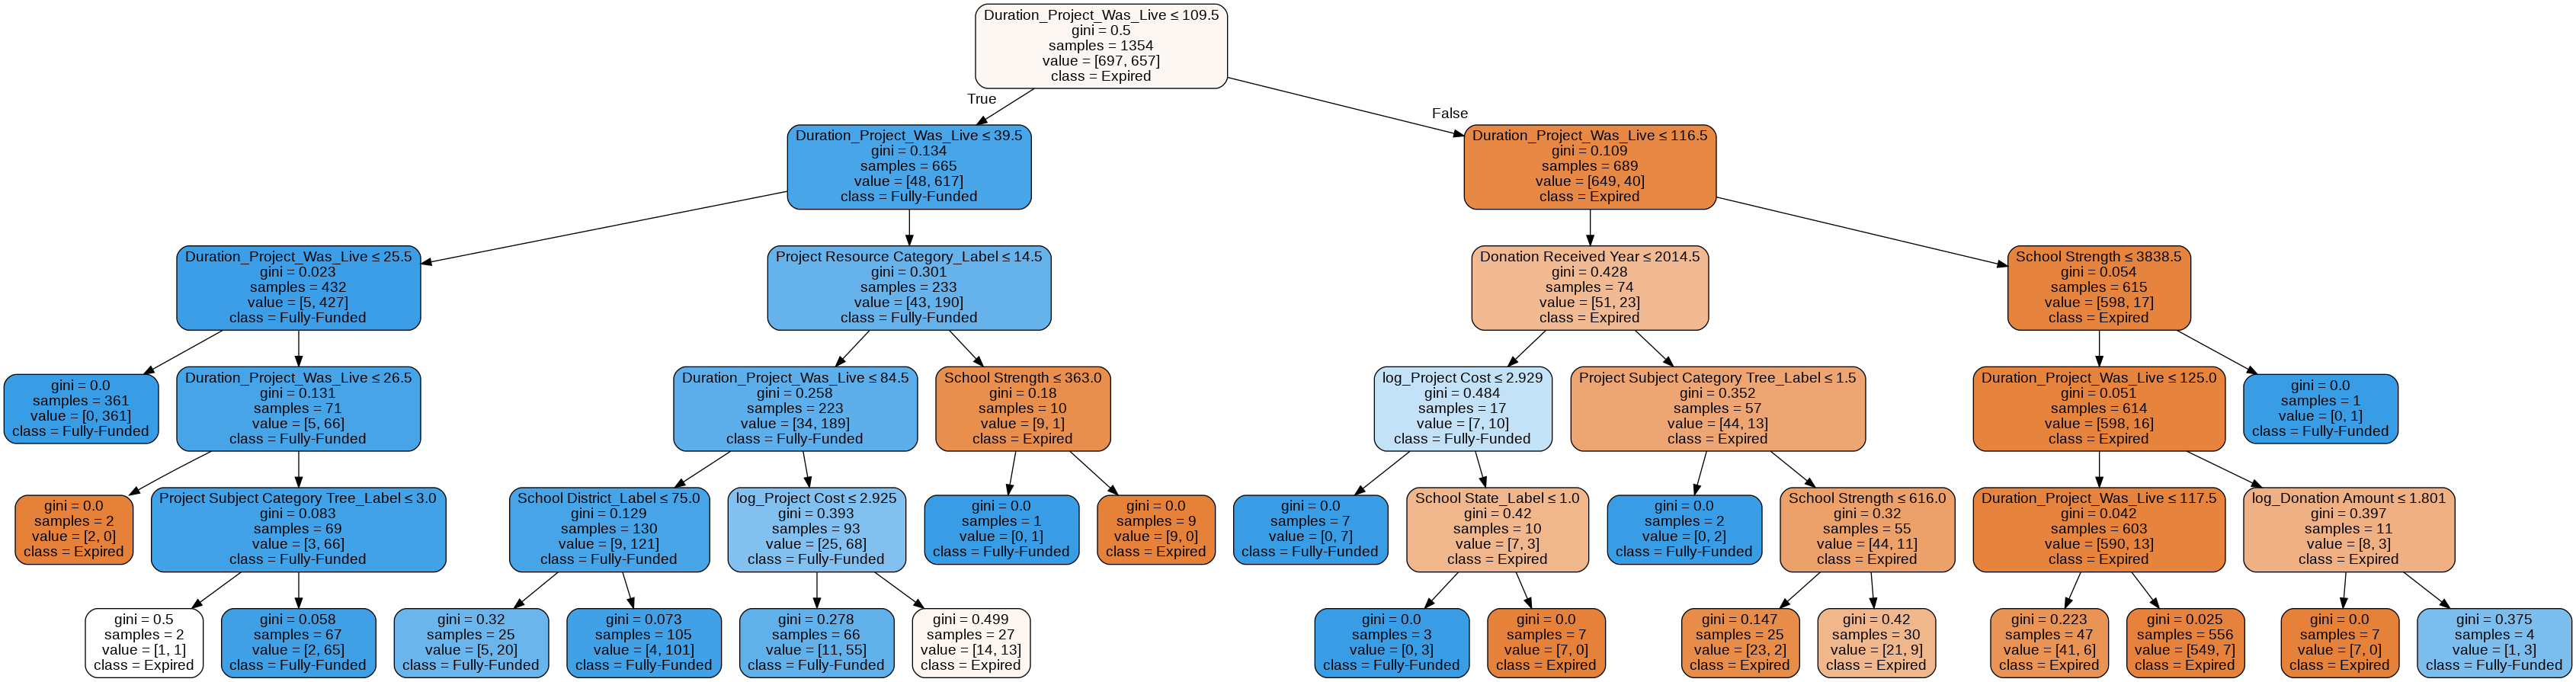

In [0]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_.columns,class_names=['Expired','Fully-Funded'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Project_Current_Status_EnrichBS_DT.png')
Image(graph.create_png())

<b> Measuring Feature Importance </b>

[0.         0.00583771 0.00861598 0.9324022  0.         0.0183805
 0.         0.00571996 0.         0.         0.00721716 0.00181908
 0.         0.         0.01508664 0.00492079]


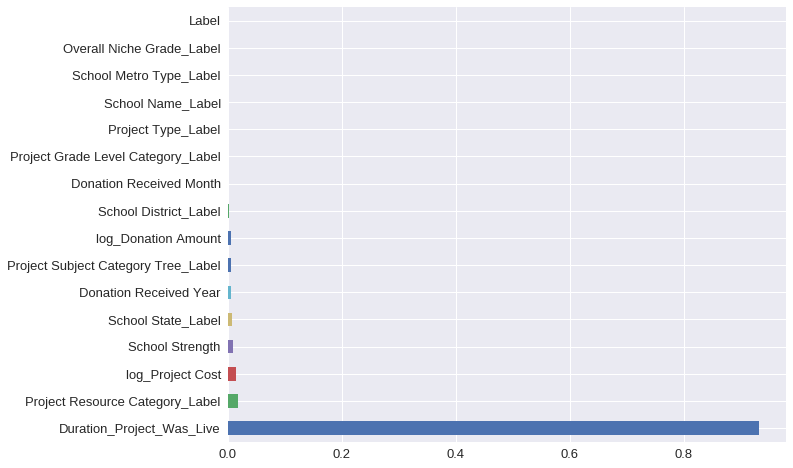

In [0]:
print(clf.feature_importances_)

#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feat_importances = pd.Series(clf.feature_importances_, index=X_.columns)
feat_importances.nlargest(20).plot(kind='barh',fontsize=13)
plt.show()

<b>Predicting values for test set</b>

In [0]:
predictions_DTree = X_predict_liveset.copy()
y_pred_testDTree = clf.predict(X_predict_liveset)
y_pred_transformed_DTree = ['Fully Funded' if x == 1 else 'Expired' for x in y_pred_testDTree]
predictions_DTree['Project Current Status'] = y_pred_transformed_DTree
predictions_DTree.to_csv('submit_EnrichBS_DTree.csv', index = False)
print('done')

done


<b> Plot ROC Curve</b>

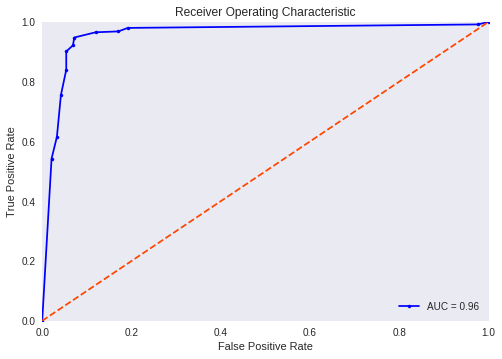

In [0]:
plotROC_Curve(clf,X_test, y_test)

### Naive Bayes

***
<b>Naive Bayes</b> classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

@Author: Pragya and Vidhi

<b> Model Training and Fitting</b>

In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
print("done with Naive Bayes")

done with Naive Bayes


<b> Quantify the Performance</b>

accuracy_score =  0.8906942392909897


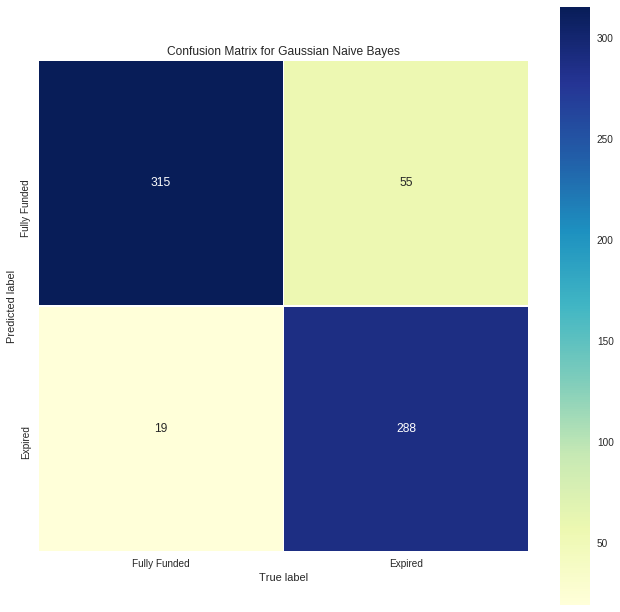

In [0]:
#accuracy calculation
accuracy = accuracy_score(y_test, pred_gnb)
print('accuracy_score = ', accuracy)
mat_gnb = confusion_matrix(y_test, pred_gnb)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Gaussian Naive Bayes")
sns.heatmap(mat_gnb.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');


In [0]:
cls_gnb = classification_report(y_test, pred_gnb, target_names=ylabels)
print(cls_gnb)

              precision    recall  f1-score   support

Fully Funded       0.85      0.94      0.89       334
     Expired       0.94      0.84      0.89       343

   micro avg       0.89      0.89      0.89       677
   macro avg       0.89      0.89      0.89       677
weighted avg       0.90      0.89      0.89       677



In [0]:
# print the number of correct matches
matches_gnb = (pred_gnb == y_test)
print("The number of correct matches for Naive Bayes",matches_gnb.sum())

# The total number of data points
print("The total number of data points for Naive Bayes:",len(matches_gnb))

# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Naive Bayes:",matches_gnb.sum() / float(len(matches_gnb)))

The number of correct matches for Naive Bayes 603
The total number of data points for Naive Bayes: 677
Accuracy for Naive Bayes: 0.8906942392909897


<b> Predicting Values for Test Set</b>

In [0]:
predictions_GNB = X_predict_liveset.copy()
y_pred_testGNB = clf.predict(X_predict_liveset)
y_pred_transformed_GNB = ['Fully Funded' if x == 1 else 'Expired' for x in y_pred_testGNB]
predictions_GNB['Project Current Status'] = y_pred_transformed_GNB
predictions_GNB.to_csv('submit_EnrichBS_GNB.csv', index = False)
print('done')

done


<b> Plot ROC Curve</b>

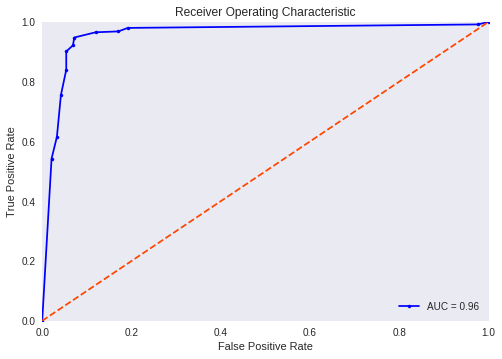

In [0]:
plotROC_Curve(clf,X_test, y_test)

### Support Vector Machines¶

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

@Author : Sithara and Reetika

<b> Model Training and Fitting</b>

In [0]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("done with Linear Support Vector Machines")

done with Linear Support Vector Machines


<b>Model Metrics</b>

accuracy_score =  0.9025110782865583 



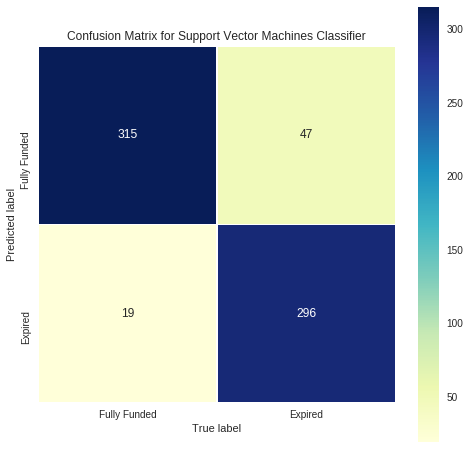

In [0]:
#accuracy calculation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print('accuracy_score = ', accuracy_svc,'\n')
mat_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots(figsize=(8,8))  
ax.set_title("Confusion Matrix for Support Vector Machines Classifier")
sns.heatmap(mat_svc.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [0]:
cls_svc = classification_report(y_test, y_pred_svc, target_names=ylabels)
print(cls_svc)

              precision    recall  f1-score   support

Fully Funded       0.87      0.94      0.91       334
     Expired       0.94      0.86      0.90       343

   micro avg       0.90      0.90      0.90       677
   macro avg       0.90      0.90      0.90       677
weighted avg       0.91      0.90      0.90       677



In [0]:
# print the number of correct matches
matches_svc = (y_pred_svc == y_test)
print("The number of correct matches for Random Forest Classifier:",matches_svc.sum())

# The total number of data points
print("The total number of data points for Random Forest Classifier:",len(matches_svc))

# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Random Forest Classifier:",matches_svc.sum() / float(len(matches_svc)))

The number of correct matches for Random Forest Classifier: 611
The total number of data points for Random Forest Classifier: 677
Accuracy for Random Forest Classifier: 0.9025110782865583


### K - Nearest Neighbour

The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

@Author: Sithara and Pragya

<b>Determining Optimal K</b>

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

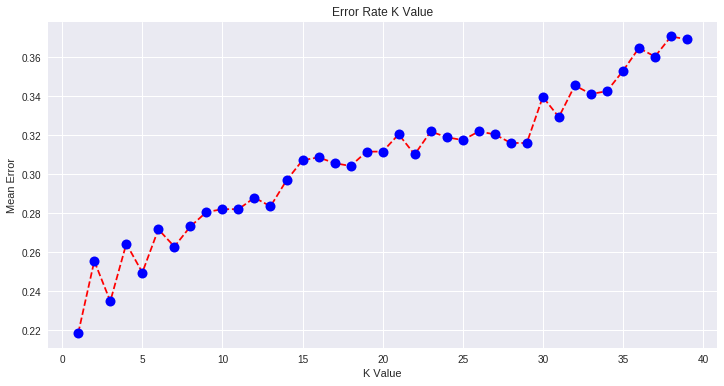

In [0]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

<b> Model Training and Fitting</b>

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)
print("done with K - Nearest Neighbour")
# algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}

done with K - Nearest Neighbour


<b> Model Metrics</b>

accuracy_score =  0.7370753323485968 



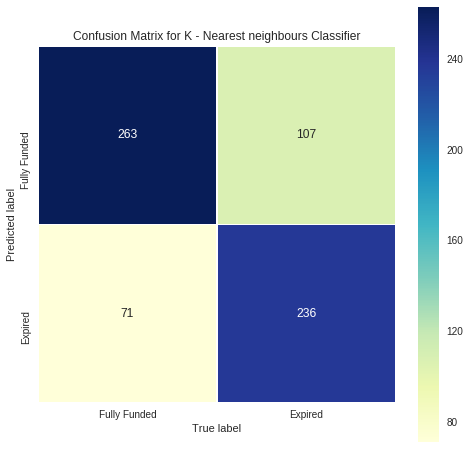

In [0]:
#accuracy calculation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('accuracy_score = ', accuracy_knn,'\n')
mat_knn = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8,8))  
ax.set_title("Confusion Matrix for K - Nearest neighbours Classifier")
sns.heatmap(mat_knn.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [0]:
cls_knn = classification_report(y_test, y_pred_knn, target_names=ylabels)
print(cls_knn)

              precision    recall  f1-score   support

Fully Funded       0.71      0.79      0.75       334
     Expired       0.77      0.69      0.73       343

   micro avg       0.74      0.74      0.74       677
   macro avg       0.74      0.74      0.74       677
weighted avg       0.74      0.74      0.74       677



In [0]:
# print the number of correct matches
matches_knn = (y_pred_knn == y_test)
print("The number of correct matches for Random Forest Classifier:",matches_knn.sum())

# The total number of data points
print("The total number of data points for Random Forest Classifier:",len(matches_knn))

# And now, the ration of correct predictions i.e. Accuracy
print("Accuracy for Random Forest Classifier:",matches_knn.sum() / float(len(matches_knn)))

The number of correct matches for Random Forest Classifier: 499
The total number of data points for Random Forest Classifier: 677
Accuracy for Random Forest Classifier: 0.7370753323485968


<b> Plot ROC Curve</b>

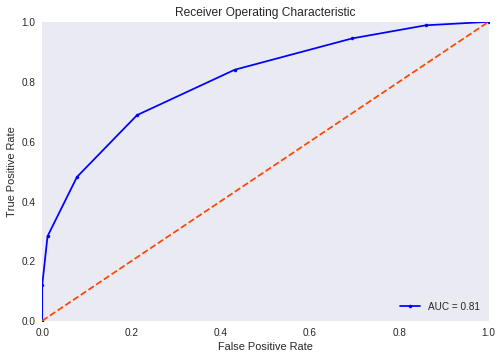

In [0]:
plotROC_Curve(knn,X_test, y_test)

### Feature Importance Using Other Methods

<b>SelectKBest</b>

@Author: Vidhi and Reetika

In [0]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_,y_)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                  Specs   Score
3             Duration_Project_Was_Live 4.1e+04
2                       School Strength 3.7e+02
8                     School Name_Label 3.2e+02
11                School District_Label      67
7   Project Subject Category Tree_Label      43
5       Project Resource Category_Label      43
13                                Label      29
14                     log_Project Cost     5.5
0               Donation Received Month     3.2
9               School Metro Type_Label     1.2


#### XGBoost

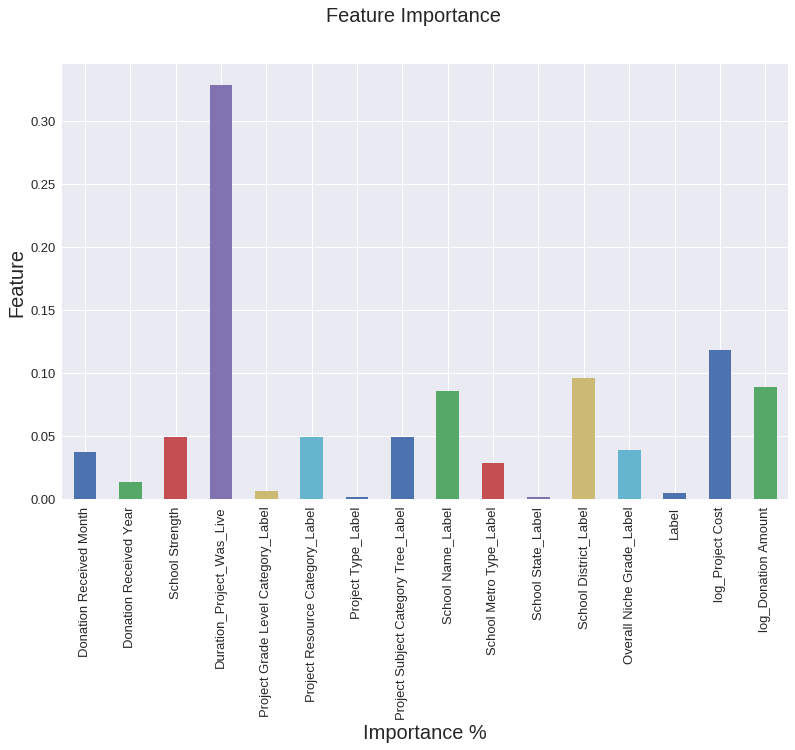

In [0]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_, y_)

importance_series = pd.Series(model_xgb.feature_importances_, \
                              index=X_.columns)

fig = plt.figure(figsize=(13, 8))
fig.suptitle('Feature Importance', fontsize=20)
plt.xlabel("Importance %", fontsize=20)
plt.ylabel("Feature", fontsize=20)
importance_series.plot(kind='bar', alpha = 1,fontsize=13)

#### ExtraTreesClassifier

[0.02147401 0.02330522 0.02182766 0.68277557 0.01521266 0.02441854
 0.00442104 0.02311338 0.01996872 0.01781226 0.01204204 0.02530342
 0.02189757 0.0155355  0.04311888 0.02777354]


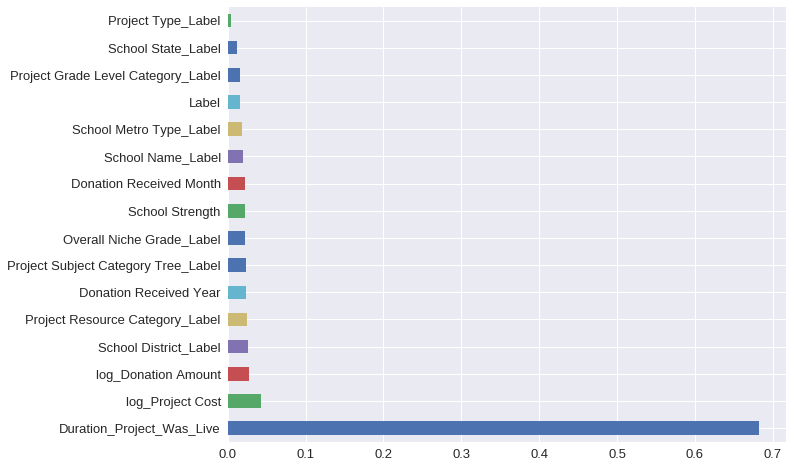

In [0]:
modelext = ExtraTreesClassifier()
modelext.fit(X_,y_)
print(modelext.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feat_importances = pd.Series(modelext.feature_importances_, index=X_.columns)
feat_importances.nlargest(20).plot(kind='barh',fontsize=13)
plt.show()

#### Voting Classifier

One can train the model using diverse algorithms and then ensemble them to predict the final output. Say, you use a Random Forest Classifier, SVM Classifier, Linear Regression etc.; models are pitted against each other and selected upon best performance by voting using the VotingClassifier Class from sklearn.ensemble.

Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.

In [0]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
X_train_vt, X_test_vt, y_train_vt, y_test_vt = train_test_split(X_, y_, test_size = 0.25, random_state = 123)

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],voting = 'hard')
voting_clf.fit(X_train_vt, y_train_vt)
pred_vt = voting_clf.predict(X_test_vt)
print("done with Voting Classifier")

done with Voting Classifier


accuracy_score =  0.9251968503937008


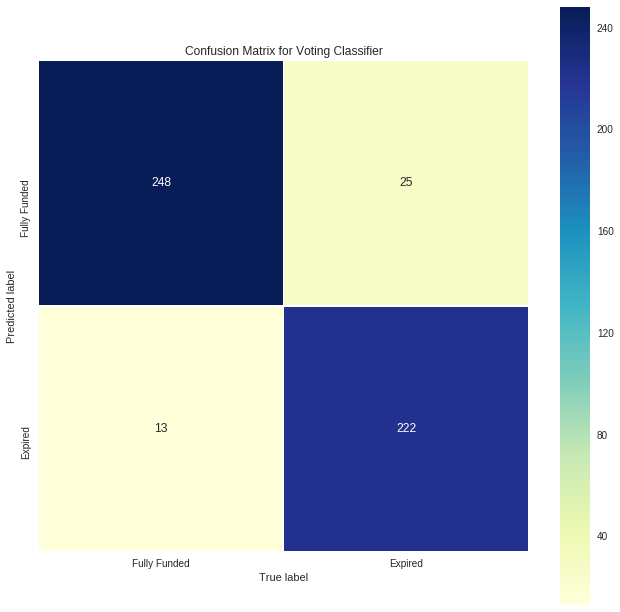

In [0]:
#accuracy calculation
accuracy = accuracy_score(y_test_vt, pred_vt)
print('accuracy_score = ', accuracy)
mat_vt = confusion_matrix(y_test_vt, pred_vt)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Voting Classifier")
sns.heatmap(mat_vt.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');


In [0]:
cls_vt = classification_report(y_test_vt, pred_vt, target_names=ylabels)
print(cls_vt)

              precision    recall  f1-score   support

Fully Funded       0.91      0.95      0.93       261
     Expired       0.94      0.90      0.92       247

   micro avg       0.93      0.93      0.93       508
   macro avg       0.93      0.92      0.93       508
weighted avg       0.93      0.93      0.93       508



In [0]:
predictions_vt = X_predict_liveset.copy()
y_pred_testvt = voting_clf.predict(X_predict_liveset)
y_pred_transformed_vt = ['Fully Funded' if x == 1 else 'Expired' for x in y_pred_testvt]
predictions_vt['Project Current Status'] = y_pred_transformed_vt
predictions_vt.to_csv('submit_VOTE.csv', index = False)
print('done')

done


# Conclusion
***
Please refer the Main notebook for description and conclusion.